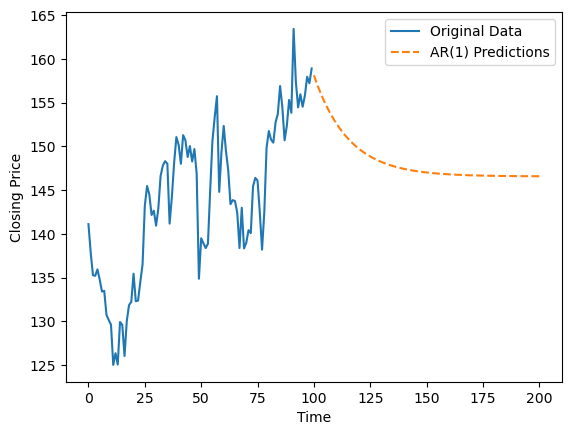

const       9.222809
close.L1    0.937076
dtype: float64


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


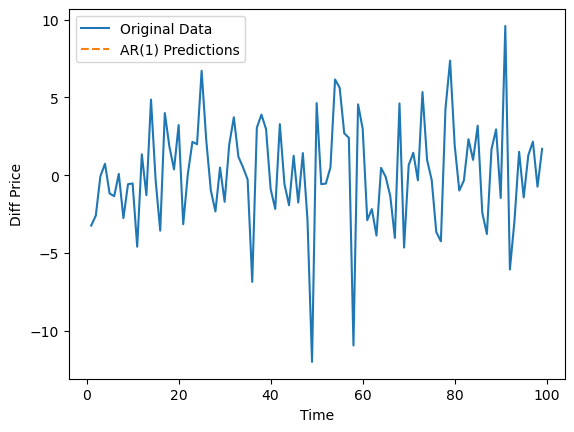

const      0.225068
diff.L1   -0.063105
dtype: float64


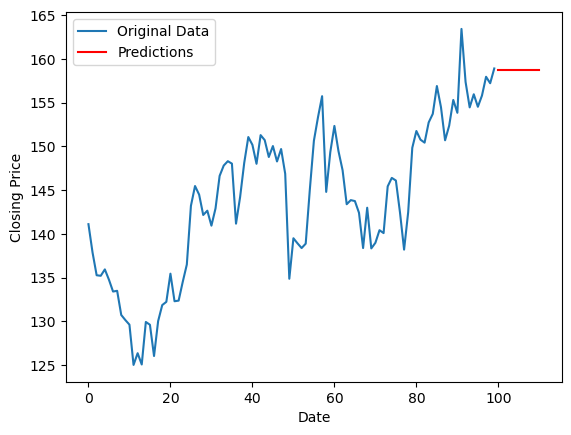

In [2]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load the stock price data for Apple Inc.
df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&apikey=R1A10JZ8TS3877SK&datatype=csv&start_date=2010-01-01')

# Fit an AR model to the closing price
closing_price = df["close"]
model = AutoReg(closing_price, lags=1)
model_fit = model.fit()

# Get the predictions
predictions = model_fit.predict(start=len(closing_price), end=len(closing_price)+100)

# Plot the original data
plt.plot(closing_price, label='Original Data')

# Plot the predictions
plt.plot(predictions, label='AR(1) Predictions', linestyle='--')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

# Show the plot
plt.show()

coef = model_fit.params
print(coef)


df['diff'] = df['close'].diff()
df = df.dropna(subset=['diff'])
diff_price=df['diff']

model = AutoReg(diff_price, lags=1)
model_fit = model.fit()

# Get the predictions
predictions = model_fit.predict(start=len(diff_price), end=len(diff_price)+10)

# Set the index of the predictions
predictions = pd.DataFrame(predictions, index=diff_price.index[-10:], columns=["Prediction"])

# Plot the original data
plt.plot(diff_price, label='Original Data')

# Plot the predictions
plt.plot(predictions, label='AR(1) Predictions', linestyle='--')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Diff Price')
plt.legend()

# Show the plot
plt.show()

coef = model_fit.params
print(coef)



                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   90
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -233.421
Date:                Tue, 24 Jan 2023   AIC                            472.842
Time:                        18:33:09   BIC                            480.308
Sample:                             0   HQIC                           475.851
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8854      0.133      6.640      0.000       0.624       1.147
ma.L1         -0.9565      0.098     -9.792      0.000      -1.148      -0.765
sigma2        11.0766      1.634      6.780      0.0

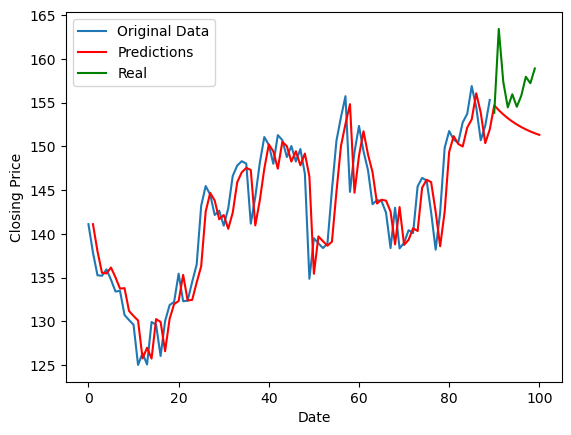

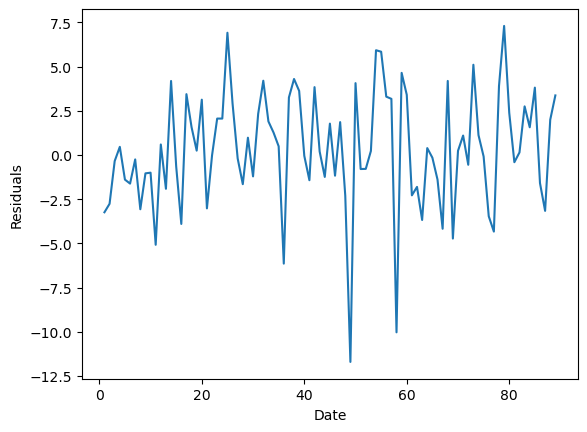

In [31]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load the stock price data for Apple Inc.
df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&apikey=R1A10JZ8TS3877SK&datatype=csv&start_date=2010-01-01')

from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the closing price
closing_price_real=df["close"][90:100]
closing_price = df["close"][0:90]
model = ARIMA(closing_price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
predictions = model_fit.predict(start=1, end=len(closing_price)+10)

# Plot the original data and predictions
plt.plot(closing_price, label='Original Data')
plt.plot(predictions, label='Predictions', color='red')
plt.plot(closing_price_real, label = 'Real', color = 'green')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Show the plot
plt.show()

# Get the residuals
residuals = model_fit.resid[1:]

# Plot the residuals
plt.plot(residuals, label='Residuals')

# Add labels
plt.xlabel('Date')
plt.ylabel('Residuals')

# Show the plot
plt.show()